<font size="6"><b>Supervised Learning</b></font>

<font size="4">Name: Popa Ioana-Diana</font>

<font size="4">E-mail: popaioana2015@yahoo.com</font>

In this project, I focus on <i>data understanding</i> and <i>data preparation</i>. Many modeling techniques rely on specific assumptions about the data, making thorough exploration and preparation crucial. 

Key questions arise:
 - What kind of model architecture best fits the data?
 - How well does the model perform technically?
 - Could its performance be improved?
 - How should the model’s performance be evaluated?
   
<i>Machine learning</i>, a subfield of artificial intelligence, offers automated, objective, and data-driven techniques for modeling. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>. In this project, I utilize <font color=green>supervised learning</font> for classification and regression tasks.

For classification, the dataset contains comprehensive health information from hospital patients with and without cardiovascular disease. The target variable "cardio," reflects the presence or absence of the disease, which is characterized by a buildup of fatty deposits inside the arteries (blood vessels) of the heart. Some data pre-processing steps are required to ensure that it's in an appropriate format so that models can learn from it.

### <font color = red> Packages needed for this exercise: </font>


In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix

%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

This project explores the world of data modeling using the K-Nearest Neighbors (k-NN) algorithm. K-NN is a classic supervised machine learning technique based on the idea that data points with similar features tend to belong to the same class and are likely to be near each other in feature space.

Here, the k-NN algorithm is applied to predict the presence of cardiovascular disease (CVD) using all other variables as features in the dataset. The target variable of interest is cardio. Before diving into modeling, let’s take a brief look at the features in the dataset.

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in years 
| sex | binary | Female == 0, Male == 1
| height | numeric | Measured weight of the patient (kg)
| weight | numeric | Measured weight of the patient (cm)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| alco | binary | A subjective feature based on asking the patient whether or not he/she consumes alcohol
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| gluc | categorical | Glucose associated risk information evaluated by a doctor

 - Take a random sample of 1,000 rows from the dataset using a fixed random seed.
 - Print the first 15 rows to ensure everything is correctly loaded.

In [111]:
# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

In [112]:
### Code - Resample and print 15 rows

#the fixed random seed:
random_seed = 2004
#the random sample of 1000 rows:
sampled_data = cardio_data.sample(n=1000, random_state=random_seed)

#the first 15 rows:
print(sampled_data.head(15))

      age  sex  height  weight  ap_hi  ap_lo  smoke  alco  active  cardio  \
270    50    0     152    45.0     90     60      0     0       0       0   
4943   41    1     175    87.0    120     80      1     0       1       1   
4854   59    0     167    70.0    120     80      0     0       1       1   
171    55    1     169    75.0    120     80      0     0       1       0   
570    58    0     164    64.0    120     80      0     0       1       0   
890    51    1     175    92.0    170    100      0     0       1       0   
4168   52    0     165    78.0    120     80      0     0       1       0   
4770   56    0     169    65.0    140     90      0     0       1       1   
1748   54    1     172    69.0    120     80      0     0       1       0   
4021   48    0     162    90.0    140     90      0     0       1       0   
4707   45    0     168    79.0    120     80      0     0       0       1   
4183   59    0     157    51.0    110     80      0     0       0       0   

To train the k-NN algorithm to recognize patterns, I need <font color=lightcoral>training data</font>. However, to evaluate how well the model has learned these patterns, I also require <font color=lightcoral>test data</font>, which remains unseen during training. The test set is only introduced to the model after training is complete to provide an unbiased estimate of its performance.

To assess model performance, I use a basic <font color=lightcoral>train-test split</font>, where the dataset is divided into two separate sets. This ensures that the model is tested on data it hasn’t encountered before.

Reproducibility is a key aspect of any research or data-driven project. If code produces entirely random results with each execution, it becomes difficult to validate findings. To address this, I use a random seed, ensuring that any random processes—such as splitting the dataset—yield consistent results across multiple runs. This approach enhances reproducibility and ensures reliability in the analysis. In fact, a fixed random seed was already applied when sampling the subset from the dataset.

Now, I gather the features into one array and the target variable into another. The dataset is then split into training (80%) and test (20%) sets while maintaining a fixed random seed. This guarantees that even if the code is executed multiple times, the split remains consistent.

Finally, an important consideration is whether stratification is necessary for this dataset. The decision depends on the distribution of the target variable and whether maintaining its proportion in both training and test sets is crucial for the analysis.

In [113]:
sampled_data['cardio'].value_counts(normalize=True)

cardio
0    0.698
1    0.302
Name: proportion, dtype: float64

In [114]:
### Code - Train-test split

X = sampled_data.drop(columns=['cardio'])  #features
y = sampled_data['cardio']  #target variable

X_train, X_test, y_train, y_test = train_test_split(
    X,                      #features
    y,                      #target
    test_size=0.2,          #test(20%)
    random_state=random_seed,  #fixed random seed
    stratify=y              #stratification 
)

<font color = lightcoral> \<Yes, I need stratification for my dataset because it is imbalanced, and I want to maintain the class distribution in both the training and test sets. Without stratification, the training set might have fewer examples from the minority class (1), which could result in poor model performance on the 1-class during testing.\></font>

----------
- I standardize the numerical features in both the train and test sets.

- I also explain how the k-NN model predicts whether a patient has cardiovascular disease (CVD) when the features are not standardized. This includes discussing the impact of varying feature scales on the model's predictions and how standardization helps mitigate these effects.

In [115]:
### Code - Standardization

#define the categorical features
categorical_features = ['sex', 'smoke', 'alco', 'active', 'cholesterol_normal', 'cholesterol_at_risk', 'cholesterol_elevated', 
                        'gluc_normal', 'gluc_at_risk', 'gluc_elevated']
#define the numerical features
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

#separate numerical and categorical features in training and test sets
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]
X_train_categorical = X_train[categorical_features]
X_test_categorical = X_test[categorical_features]

scaler = StandardScaler() #creates an instance of the StandardScaler class

#standardize the numerical features in both the train and test sets
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled = scaler.transform(X_test_numerical)

#convert the scaled numerical data back into a pd.DataFrame
X_train_numerical_scaled = pd.DataFrame(X_train_numerical_scaled, columns=numerical_features)
X_test_numerical_scaled = pd.DataFrame(X_test_numerical_scaled, columns=numerical_features)

#reset indices of categorical dataframes(without this part, the indices don't align properly between the scaled numerical and categorical DataFrames)
X_train_categorical = X_train_categorical.reset_index(drop=True)
X_test_categorical = X_test_categorical.reset_index(drop=True)

#concatenate: scaled numerical features + categorical features
X_train_scaled = pd.concat([X_train_numerical_scaled, X_train_categorical], axis=1)
X_test_scaled = pd.concat([X_test_numerical_scaled, X_test_categorical], axis=1)

<font color = lightcoral> \<In general, the k-NN algorithm makes predictions based on the distances between data points in the feature space. When the features are not standardized, the varying scales of different features can disproportionately influence the distances. A feature with a range of hundreds will have a greater impact on the distance calculation compared to a feature with a smaller range, leading the algorithm to make incorrect predictions. After standardization, each feature will have a mean of 0 and a standard deviation of 1. This ensures that all features are on a comparable scale, contributing equally to the distance calculations, which allows the model to make much more accurate predictions. \></font>

-------

- Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.

In [116]:
### Code - the kNN classifier

#train the k-NN model with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

#make predictions on the test set using the trained k-NN model
y_pred = knn_model.predict(X_test_scaled)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#extract the individual components of a confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

#calculate the accuracy, the precision and the recall
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
[[113  27]
 [ 29  31]]
Accuracy: 0.72
Precision: 0.53
Recall: 0.52


True Negative(TN) represents a case where the patient doesn't have a cardiovascular disease, and the k-NN model correctly predicts the absence of the disease.

False Positive(FP) represents a case where the patient doesn't have a cardiovascular disease, and the k-NN model incorrectly predicts that the patient has a cardiovascular disease.

False Negative(FN) represents a case where the patient has a cardiovascular disease, and the k-NN model incorrectly predicts the absence of the disease.True Positive(TP) in the context of our dataset represents a case where the patient has a cardiovascular disease, and the k-NN model correctly predicts the presence of the disease.

The model performs well in recognizing negative cases (the patient doesn't have a disease), having 113 TN and just 27 FP. About recognition of positive cases (the patient has the disease), we can't say the same thing because we only have 31 TP and 29 FN, and this can be seen in the recall value of 0.52. The differences come from the fact that the 0-class has significantly more instances than the 1-class, as we've just seen in the class distribution. That's why the model performs better on negative cases because it is the majority class. Accuracy shows the overall correctness. Precision reflects how often the model's predictions for the positive class are correct. Recall focuses on how well the model identifies positive cases.

We should be a little more cautious when interpreting the accuracy because, with an imbalanced data distribution, it measures the proportion of all correct predictions but doesn't account for the distribution of classes. So, if our model predicts "no disease" for the majority of cases, it will automatically have a good result just because there are more negative cases in general, but that's not right!


__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

I continue focusing on detecting CVD by utilizing the k-NN model once again to predict the presence of the disease. To assess whether the k-NN model is well-suited for this task, I apply leave-one-out cross-validation (LOOCV). This method evaluates the model by iteratively training it on all but one data point and testing it on the excluded instance, repeating the process for each observation in the dataset.

For this evaluation, I use the full sample of 1,000 data points.

Now, I analyze the results:
 - How does the accuracy compare to the previous approach?
 - Based on the performance, is the k-NN model effective for this problem?

In [117]:
### Code - Leave-one-out cross-validation

loo = LeaveOneOut()

#perform leave-one-out cross-validation & calculate accuracy
cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=loo, scoring='accuracy')

#mean accuracy
loo_accuracy = cv_scores.mean()

print(f"Leave-one-out cross-validation Accuracy: {loo_accuracy:.2f}")

Leave-one-out cross-validation Accuracy: 0.76


<font color = royalblue> \<The accuracy of leave-one-out cross-validation (0.76) is slightly better than the previous task (0.72), which suggests that the model generalizes better when the dataset is split into multiple different training and test sets using leave-one-out cross-validation.
Yes, the k-NN model works for the problem at hand because using multiple different training and test sets will give us a better-trained model, a fact that is also suggested by the higher accuracy score.\></font>

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

For this part of the project, I aim to find the optimal k value for the k-NN model by testing a range of k values from 1 to 30 using leave-one-out cross-validation. I will plot the accuracies versus the k values and use the entire sample of 1,000 data points for this task.

Afterward, I will determine which k value produces the best accuracy during cross-validation and compare the result to the previous model where I used k=3.

I will also explore the impact of increasing the k value, observing at what point the accuracy starts to plateau. I’ll investigate why this happens and analyze how choosing a very small or very large number of neighbors affects the model’s ability to distinguish between healthy individuals and those with cardiovascular disease (CVD).

In [118]:
### Code - Select best model

#list for accuracies(for each value of k)
k_values = range(1, 31)
accuracies = []

#leave-one-out cross-validation for k = 1...30
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=loo, scoring='accuracy')
    accuracies.append(scores.mean())
    
#optimal k value
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f"The best k is {best_k} with an leave-one-out cross-validation accuracy of {best_accuracy:.2f}")


The best k is 5 with an leave-one-out cross-validation accuracy of 0.77


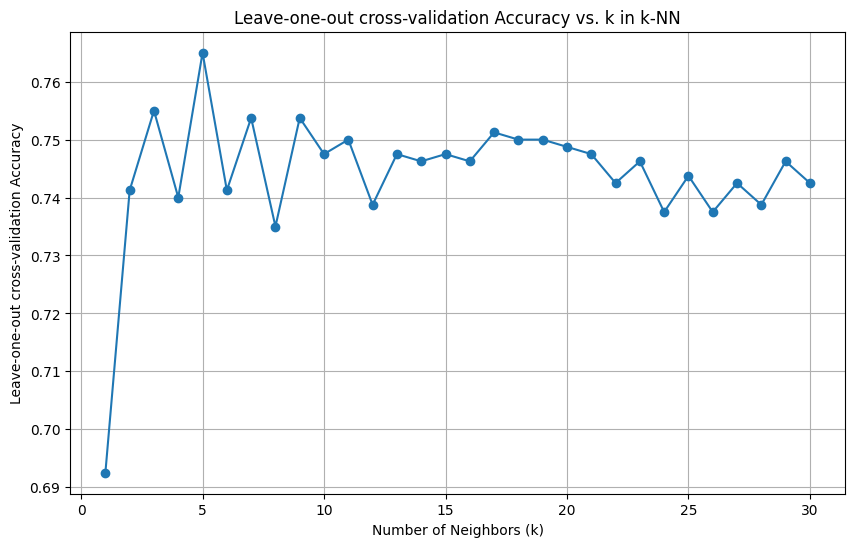

In [90]:
### Code - Plot the accuracies vs. the values for k

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Leave-one-out cross-validation Accuracy vs. k in k-NN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Leave-one-out cross-validation Accuracy')
plt.grid()
plt.show()

The best value of k when using leave-one-out cross-validation is 5, with an accuracy of 0.77. The accuracy of the optimal k=5 is slightly higher than the previous result for k=3 , which had an accuracy of 0.76. However, the difference is not very significant, so both models perform well. 

When the number of k is further increased, the accuracy approaches a limit of 0.74 because, as k becomes very large, the model considers nearly all the data points as neighbors and categorizes every instance as belonging to the majority class (0-class, which has a distribution of 69.8%). In this way, the model loses its sensitivity to the minority class (1-class).

When k is very small, such as k=1, the model becomes sensitive to noise and outliers. The model may result in overfitting because each prediction is based on the closest neighbor. When k is very large, even exceeding 30 and approaching the size of the dataset, the model generalizes too much. A large number of neighbors for each prediction makes the model likely to predict the majority class (0-class) regardless of the actual data point's features, which can lead to underfitting. 

_____________________

## <font color = darkorange> 4. Ridge regression </font>

Now, we shift the focus to another kind of supervised learning - regression - as we are changing the main objective from predicting discrete classes to estimating continuous values. The following part is going to involve utilizing one regression model, Ridge Regression, and our goal is to evaluate the performance of this model.

Thus, we will also change the dataset - the new dataset is about brushtail possums and it includes variables such as:

| Feature | Type | Explanation |
| :- | :- | :-
|sex|binary| Sex, either male (0) or female (1)
|age|numeric| Age in years
|len_head|numeric| Head length in mm
|width_skull|numeric| Skull width in mm
|len_earconch|numeric| Ear conch length in mm
|width_eye|numeric| Distance from medial canthus to lateral canthusof right eye, i.e., eye width in mm
|len_foot|numeric| Foot length in mm
|len_tail|numeric| Tail length in mm
|chest|numeric| Chest grit in mm
|belly |numeric| Belly grit in mm
|len_total|numeric| Total length in mm

In this case, our target variable will be *the age of the possum*.

In [119]:
# Data path
data_path = 'ex2_possum_data.csv'

# Load the data 
possum_data = pd.read_csv(data_path)

-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average. 

We start by examining those relationships between the variables in the given dataset.

We will plot pairwise relationships between the age variable and the others, coloring the samples based on the sex variable. This will help us to find out which body dimensions are the most correlated with age.

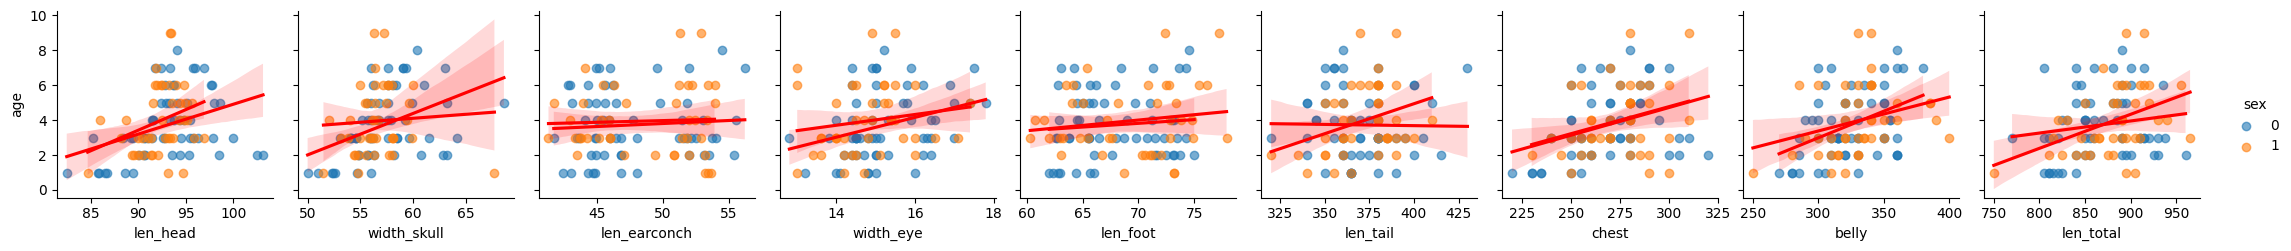

In [120]:
### Code - Pairplot

#variables of interest
features = ['len_head', 'width_skull', 'len_earconch', 'width_eye', 'len_foot', 
            'len_tail', 'chest', 'belly', 'len_total']

sns.pairplot(
    possum_data,
    y_vars='age',
    x_vars=features,
    hue='sex',
    kind='reg',
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}}
)

plt.show()

The body dimensions that seem to be most correlated with age are chest and belly, as their scatterplots indicate stronger linear relationships with age compared to the other features.There are variables that appear to have no correlation with age, such as len_earconch, which shows a very scattered plot with no clear relationship with age. 

Also, there are differences in the correlations between males and females, as shown by the regression lines. While for some features the variation between sexes is minimal, for others the differences are more pronounced.

------

Before conducting the regression analysis, I’ll first ensure that my dataset is in the proper format. I’ll also perform the train-test split, as I plan to evaluate the overall performance of the model using the test set.

I’ll start by performing an 80/20 train-test split.

Note: I’ll set the features in a dataframe called possum_X so that I can easily work with the upcoming code snippets.

In [121]:
### Code - Data preparation
#check for missing values
print("Missing values in the dataset:")
print(possum_data.isnull().sum())

Missing values in the dataset:
sex             0
age             0
len_head        0
width_skull     0
len_earconch    0
width_eye       0
len_foot        0
len_tail        0
chest           0
belly           0
len_total       0
dtype: int64


In [122]:
possum_X = possum_data[features]
possum_y = possum_data['age']

#train-test (80/20) split
X_train2, X_test2, y_train2, y_test2 = train_test_split(possum_X, possum_y, test_size=0.2, random_state=42)

#standardization
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

------

In my project, I focus on Ridge Regression, specifically on the hyperparameter $\lambda$ (read as 'lambda'), which is the regularization term.

I’ll fit a Ridge Regression model using the entire training set, setting the hyperparameter 'lambda' to 64. Then, I’ll evaluate the model using the test set and analyze the results. For this evaluation, I’ll use mean absolute error (MAE).
 - How well does the model perform in estimating the possums' ages?
 - How should I interpret the MAE in this case when the target variable is age?
   
<font color = darkorange>The model performs quite well in estimating the possums' ages, with an MAE of 1.51. Based on the previous graphics, the maximum lifespan of a possum is 10 years, so an MAE of 1.51 years is acceptable. This indicates that, on average, the model’s predicted age is off by approximately 1.51 years from the actual age.</font>

In [123]:
## Code - Ridge regression
#fit a ridge regression model with lambda=64
ridge_model = Ridge(alpha=64)
ridge_model.fit(X_train_scaled2, y_train2)

y_pred2 = ridge_model.predict(X_test_scaled2)

#mean absolute error(MAE)
mae = metrics.mean_absolute_error(y_test2, y_pred2)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.51


Now that we have fitted the regression model, let's break it down for better understanding. The model is essentially a linear regression model with an added regularization term (to deal with e.g. overfitting). We can write the equation used by the model to predict an opossum's age as:

$$
\text{Predicted age} = w_1 \times \text{Sex} + w_2 \times \text{Head length} + w_3 \times \text{Skull width} + ... + w_{10} \times \text{Total length} + \text{Bias}
$$

As mentioned earlier, regression focuses on the relationships between the features and the target variable. In the equation above, each feature contibutes a certain amount to the predicted age, based on the weight $w_i$ learned for that feature. For example, if the total length of an opossum has a large positive weight, it suggests that opossums with greater length are predicted to be older. 

We will access the necessary `Ridge` class attributes in order to write down the equation used by our fitted model. For example, the `coef_` variable contains the learned weights $w_1, ..., w_{10}$ and the `intercept_` variable holds the bias term. 

In [124]:
coefficients = ridge_model.coef_ 
bias = ridge_model.intercept_ 
feature_names = possum_X.columns 

# Let's write the equation
equation = 'Predicted age = '
for i in range(len(coefficients)):
    equation += f'{coefficients[i]:.3f}*{feature_names[i]} + '

equation += f'{bias:.3f}'
print(equation)

Predicted age = 0.157*len_head + 0.083*width_skull + 0.048*len_earconch + 0.203*width_eye + -0.115*len_foot + 0.023*len_tail + 0.143*chest + 0.209*belly + 0.075*len_total + 3.788


________________
## <font color = slategrey> Feature selection - most useful features in predicting cardiovascular diseases </font>

Lastly, we will return to the first dataset and try to identify <font color = slategrey>five [5] most useful features</font> for predicting the presence of the CVD.  The steps needed for this job are the same as above, except for the feature selection part.

Regarding the feature selection itself, we will use <font color = slategrey>Random Forest</font> and its built-in feature importance estimation in scikit-learn.

We will evaluate the chosen model using accuracy and the area under the ROC curve (AUC), drawing the corresponding curve in a plot. In the end, we will also discuss the findings and results.

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

#At first, I train the Random Forest model:
rf_model = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf_model.fit(X_train_scaled, y_train)

#Then I get the feature importances:
feature_importances = rf_model.feature_importances_

#After that, I create a DataFrame to display the feature importances:
importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importances
})

#And that's how we select the 5 most useful features, by sorting them by feature importances:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Print the 5 most important features and their importances:
top_5_features = importance_df.head(5)
print("Top 5 Important Features for predicting the presence of the CVD:")
print(top_5_features)

Top 5 Important Features for predicting the presence of the CVD:
  Feature  Importance
3   ap_hi    0.199958
0     age    0.186466
2  weight    0.176776
1  height    0.171263
4   ap_lo    0.105966


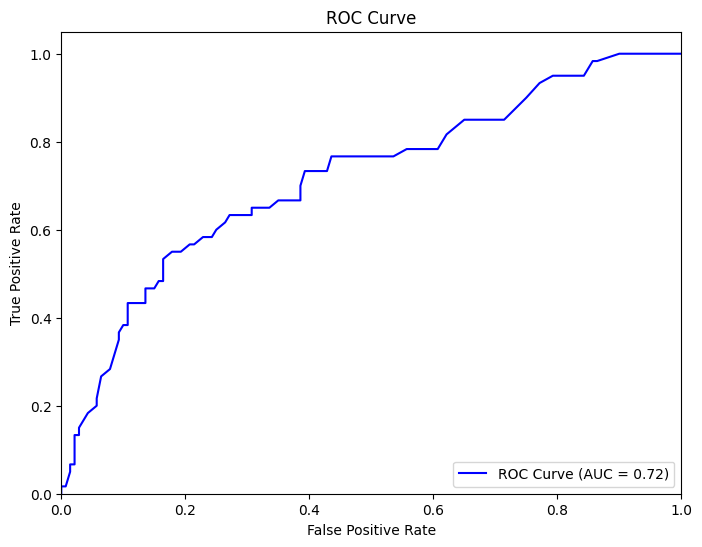

Accuracy: 0.74
Area Under the Curve (AUC): 0.72


In [138]:
#After finding the 5 most useful features, I train the Random Forest model on the selected features(ap_hi, age, weight, height, ap_lo):
X_train_selected = X_train_scaled[top_5_features['Feature'].values] 
X_test_selected = X_test_scaled[top_5_features['Feature'].values]
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf_model_selected.fit(X_train_selected, y_train)

#And then I make predictions on the test set:
y_pred = rf_model_selected.predict(X_test_selected)

#Then, I calculate the accuracy and the area under the ROC curve (AUC):
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot ROC Curve:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Final step, I print the accuracy and the area under the ROC curve (AUC):
print(f"Accuracy: {accuracy:.2f}")
print(f"Area Under the Curve (AUC): {roc_auc:.2f}")

In [136]:
#Here we can observe what goes wrong in my AUC analysis, if I use the predictions from the predict() function 
#instead of the predict_proba() function to calculate the AUC : 
y_pred_prob = rf_model_selected.predict_proba(X_test_selected)[:, 1] #prediction with the predict_proba()
fpr_prob, tpr_prob, _ = roc_curve(y_test, y_pred_prob)
roc_auc_prob = auc(fpr_prob, tpr_prob) #calculate AUC for both cases to see the differences, here is for the prediction made with predict_proba()

y_pred = rf_model_selected.predict(X_test_selected) #prediction with the predict()
fpr_pred, tpr_pred, _ = roc_curve(y_test, y_pred)
roc_auc_pred = auc(fpr_pred, tpr_pred) #calculate AUC for the prediction made with predict()

#Print both the AUC values to compare them:
print(f"AUC using predict_proba: {roc_auc_prob:.2f}")
print(f"AUC using predict: {roc_auc_pred:.2f}") 

AUC using predict_proba: 0.72
AUC using predict: 0.68


- The value of accuracy: 0.74 is high, but also might be misleading. Since the dataset is imbalanced, the model may favor predicting the majority class (0) to achieve higher accuracy. Accuracy alone doesn't fully reflect how well the model detects the minority class (1). In this case of class imbalance, the AUC value is a better metric. With an AUC of 0.72, it means that the model can correctly rank positive cases (1) higher than negative cases (0) 72% of the time, which is a good score (but not excelent).

- If I use predict() instead of predict_proba() for calculating the AUC, I'm using the model's final decision (0/1) rather than its probabilities. This leads in a less detailed ranking of cases, which results to a lower AUC score. That's why my AUC score with predict() is 0.68, while with predict_proba() it's 0.72.The one with predict_proba() is more informative and accurate.